In [3]:
import requests
import pandas as pd

# Initialize an empty list to store DataFrames created from each API response.
dfs = []

# Set the base URL for the Zillow API.
url = "https://zillow56.p.rapidapi.com/search"
# Define the headers including the API key and host for the Zillow API.
headers = {
    "X-RapidAPI-Key": "b7c73cd2c8msh64bbcb44f18ef34p16d1a9jsn841f840d488f",
    "X-RapidAPI-Host": "zillow56.p.rapidapi.com"
}


list_of_states= ["Washington","Virginia","New Jersy","New Hampshire","Massachusetts","Delaware","California","Texas","Connecticut","Florida","Georgia","Indiana",
                 "Newyork","North Carolina","Ohio","Pennsylvania","Arizona",""]
# Loop through pages 1 to 50 to fetch data for each page.

for state in list_of_states:
    for page in range(1, 50):
        # Update the query string with the current page number.
        querystring = {"location": state, "page": str(page)}
        # Make the HTTP GET request to the Zillow API with the specified parameters.
        response = requests.get(url, headers=headers, params=querystring)
        # Parse the JSON response.
        data = response.json()
    
        # Create a DataFrame from the JSON response.
        # Note: This step assumes that the JSON response is structured as a list of records.
        df = pd.DataFrame(data)
    
        # Append the newly created DataFrame to the list of DataFrames.
        dfs.append(df)





ValueError: If using all scalar values, you must pass an index

In [ ]:
# Concatenate all the DataFrames in the list into a single DataFrame.
# This results in a combined DataFrame containing the data from all pages.
final_df = pd.concat(dfs, ignore_index=True)

# Save the aggregated DataFrame to a CSV file without the index column.
final_df.to_csv('all_merged_data.csv', index=False)

## convert json to csv readable data

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame.
df = pd.read_csv('all_merged_data.csv')

# Assuming 'df' is your DataFrame with the 'results' column containing dictionaries
result_dicts = df['results'].apply(eval).tolist()

# Create an empty list to store the row data
row_data = []

# Iterate over each dictionary
for d in result_dicts:
    row_data.append(d)

# Create a new DataFrame from the row data
new_df = pd.DataFrame(row_data)

print(new_df.head())



## Featutre Engineering

## merge columns to lotArea_sqft and lotArea_sqft acres to  lotArea_sqft only 

In [4]:

def convert_to_sqft(value, unit):
    if pd.isna(value) or pd.isna(unit):  # Check for NaN or blank values.
        return None  # Return None or you could choose to return 0 or another placeholder.
    if unit == 'acres':
        return value * 43560
    elif unit == 'sqft':
        return value
    else:
        raise ValueError("Unknown unit type")

# Apply the conversion to a new column 'lotArea_sqft'.
new_df['lotArea_sqft'] = new_df.apply(lambda row: convert_to_sqft(row['lotAreaValue'], row['lotAreaUnit']), axis=1)


NameError: name 'new_df' is not defined

## keep only required columns

In [89]:
selected_columns = [
    'bathrooms', 'bedrooms', 'city', 'homeType', 
    'latitude', 'longitude', 'livingArea',
    'lotArea_sqft', 'price', 'state', 
    'streetAddress', 'zipcode'
]

df_selected = new_df[selected_columns]


In [90]:
df_selected.count()

bathrooms        18859
bedrooms         18584
city             20131
homeType         20131
latitude         20001
longitude        20001
livingArea       18357
lotArea_sqft     17325
price            20131
state            20131
streetAddress    20131
zipcode          20131
dtype: int64

In [91]:
df_selected.drop_duplicates()

,bathrooms,bedrooms,city,homeType,latitude,longitude,livingArea,lotArea_sqft,price,state,streetAddress,zipcode
0,2.0,3.0,Mesa,SINGLE_FAMILY,33.399773,-111.664310,1835.0,6852.000,399900.0,AZ,7732 E Pueblo Ave,85208
1,2.0,3.0,Florence,MANUFACTURED,32.959890,-111.323830,1569.0,64699.668,255000.0,AZ,8945 N Page Rd,85132
2,2.0,3.0,Lakeside,SINGLE_FAMILY,34.197773,-109.907320,2260.0,100623.600,649000.0,AZ,9347 Mountain Meadow Ln,85929
3,NaN,NaN,Wittmann,LOT,33.746326,-112.534320,NaN,383328.000,325000.0,AZ,28500 N Crozier Rd #0,85361
4,4.0,4.0,Litchfield Park,SINGLE_FAMILY,33.505280,-112.481155,3175.0,43603.560,1199000.0,AZ,4807 N 196th Dr,85340
...,...,...,...,...,...,...,...,...,...,...,...,...
20126,2.0,2.0,Seattle,CONDO,47.637856,-122.387930,1598.0,1533.312,1025000.0,WA,2100 Thorndyke Avenue W UNIT 301,98199
20127,2.0,2.0,Ocean Shores,MANUFACTURED,47.011555,-124.153100,1420.0,10933.560,399900.0,WA,766 Cardinal Avenue NE,98569
20128,2.0,3.0,Kirkland,SINGLE_FAMILY,47.661260,-122.184530,1620.0,9178.092,1328000.0,WA,11626 NE 60th Street,98033
20129,3.0,5.0,Kirkland,SINGLE_FAMILY,47.673360,-122.169520,3453.0,5018.112,2695000.0,WA,7710 127th Place NE,98033


In [92]:
df_selected.count()

bathrooms        18859
bedrooms         18584
city             20131
homeType         20131
latitude         20001
longitude        20001
livingArea       18357
lotArea_sqft     17325
price            20131
state            20131
streetAddress    20131
zipcode          20131
dtype: int64

In [93]:

df_selected.to_csv('all_filtered_results_dataset.csv', index=False)


In [1]:
# Define helper functions for cleaning operations

def fill_missing_numeric(df_selected, column):
    """ Fill missing values in numeric columns with the median of the column """
    median = df_selected[column].median()
    df_selected[column].fillna(median, inplace=True)

def fill_missing_categorical(df_selected, column):
    """ Fill missing values in categorical columns with the mode of the column """
    mode = df_selected[column].mode()[0]
    df_selected[column].fillna(mode, inplace=True)

# Fill missing values for numeric columns
numeric_columns = ['bathrooms', 'bedrooms', 'livingArea', 'lotArea_sqft']
for col in numeric_columns:
    fill_missing_numeric(df_selected, col)

# Check for outlier detection: examining 'price', 'livingArea', and 'lotArea_sqft'
df_selected.describe(percentiles=[.01, .05, .25, .75, .95, .99])

NameError: name 'df_selected' is not defined

## Data Process

**Data Collection**
For the house pricing regression model, meaningful data is collected using the Zillow API available through RapidAPI. This API offers access to comprehensive real estate data covering most U.S. states, including property details such as square footage, location, number of bedrooms, and historical transaction prices.

**Data Governance**
Given the sensitivity and commercial value of real estate data, our usage of the Zillow API through RapidAPI adheres to the terms and conditions set forth by both Zillow and RapidAPI. This ensures that the data used for predictive modeling is collected ethically and legally.

**Data Preprocessing**
Once the data is collected in JSON format from the API, the following preprocessing steps are undertaken to prepare it for analysis:
- **Conversion**: Convert JSON data to a CSV format for easier manipulation and analysis.
- **Cleaning**: Review the dataset to identify and remove null values, correct data entry errors, and handle outliers that could skew the predictive modeling.
- **Standardization**: Standardize data types and column names to ensure consistency across the dataset. This step is crucial for integrating data from various sources and states.

**Data Transformation**
To transform the raw data into a format suitable for regression analysis, we perform several operations:
- **Feature Engineering**: Generate new features that may influence house prices, such as price per square foot, age of the property, and proximity to key amenities.
- **Normalization**: Apply normalization techniques to scale numerical data, ensuring that the model isn’t biased toward variables on larger scales.
- **Dimensionality Reduction**: Given the extensive dataset, apply Principal Component Analysis (PCA) or Truncated Singular Value Decomposition (TSVD) to reduce the number of features while preserving the most informative aspects for regression.

**Model Development and Evaluation**
- **Splitting Data**: Divide the dataset into training, testing, and validation segments with a 60:20:20 ratio. This segmentation allows for comprehensive training and unbiased evaluation of the model's performance.
- **Regression Analysis**: Train regression models such as Linear Regression, Ridge, Lasso, and more advanced ensemble methods like Gradient Boosting and Random Forest to predict house prices.
- **Model Optimization**: Use grid search and cross-validation techniques to fine-tune hyperparameters and select the model that offers the best balance of accuracy and performance.

**Integration and Finalization**
- **User Interface**: Develop a user-friendly interface that allows real estate professionals and potential buyers to input property details and receive price estimates.
- **Model Deployment**: Integrate the final model into a web-based platform, ensuring it remains responsive and accurate as new data becomes available.
- **Data Storage**: Save the transformed and cleaned datasets in CSV format for ongoing use and future model retraining.

**Quality Control and Outcomes**
- **Evaluation Metrics**: Employ metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² to assess the precision and efficacy of the regression models.
- **Documentation and Reporting**: Maintain thorough documentation of the data collection, model development, and evaluation processes to ensure transparency and reproducibility.

This structured approach ensures that the house pricing regression model is robust, scalable, and capable of delivering accurate price predictions that cater to the dynamic needs of the real estate market.

## Data Collection Plan for Zillow Housing Dataset**

**Description of the data collection - Zillow API via RapidAPI**
Zillow's API, accessed through RapidAPI, is a rich resource for real estate data. It aggregates property listings, historical transaction data, and other relevant real estate information which can be instrumental in developing predictive models for housing prices across most U.S. states.

**Why are we collecting data?**
We are collecting this data to create a comprehensive predictive model for housing prices. The dataset will support the development of regression models that can forecast prices based on a variety of property features and market conditions.

**How will the data help?**
The data collected from Zillow will provide us with a multitude of property attributes that are crucial for determining house valuations, such as the number of bathrooms, home type, and square footage, as well as market trends indicated by variables like days on Zillow and price changes.

**What should we do after collecting data?**
Post-collection, we will perform an extensive cleaning and preprocessing routine to ensure the quality and usability of the data for regression analysis.

**Key Variables / Data Table**
| Variable # | Variable Title           | Unit of Measurement     | Data Type     | Collection Method |
|------------|--------------------------|-------------------------|---------------|-------------------|
| 1          | bathrooms                | Count                   | Float         | API               |
| 2          | bedrooms                 | Count                   | Integer       | API               |
| ...        | ...                      | ...                     | ...           | ...               |
| n          | videoCount               | Count                   | Integer       | API               |

**Data Process**
- **Conversion**: Data initially retrieved in JSON format will be converted to CSV for ease of use.
- **Cleaning**: The dataset will be scrutinized for missing or anomalous data entries, and any such entries will be addressed accordingly.
- **Standardization**: Ensure all data types and formats are consistent, and the column names follow a standardized naming convention to facilitate data integration and analysis.

**Data Transformation**
- **Feature Engineering**: Derive new features that could enhance the model's accuracy, such as the price per square foot or the ratio of living area to lot size.
- **Normalization and Scaling**: Apply appropriate scaling techniques to the numerical data to bring all the variables onto a comparable scale, which is essential for certain regression algorithms.
- **Dimensionality Reduction**: For high-dimensional data, apply dimensionality reduction techniques like PCA to distill the data to its most informative components.

**Data Split**
- The data will be split into training, validation, and testing sets with the ratio of 60:20:20, ensuring the diversity and representation across the dataset.

**Outcome Measurement**
- **Evaluation Metrics**: Determine model performance using metrics like MAE, RMSE, and adjusted R².
- **Quality Control**: Conduct validation checks and model diagnostics to ensure robust and reliable model performance.

**Data Storage**
- The cleaned and transformed dataset will be stored in a CSV file format for accessibility and ease of use in the model development phase.

**Project Documentation**
- **Data Collector**: Document the name of the personnel responsible for data collection.
- **Date Duration**: Note the time frame for the data collection process.

By adhering to this plan, we aim to develop a data-driven model with the capacity to provide accurate and actionable insights into the housing market.

Summary of  Data From zillow Using a Pandas Data Frame


In [99]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20131 entries, 0 to 20130
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      18859 non-null  float64
 1   bedrooms       18584 non-null  float64
 2   city           20131 non-null  object 
 3   homeType       20131 non-null  object 
 4   latitude       20001 non-null  float64
 5   longitude      20001 non-null  float64
 6   livingArea     18357 non-null  float64
 7   lotArea_sqft   17325 non-null  float64
 8   price          20131 non-null  float64
 9   state          20131 non-null  object 
 10  streetAddress  20131 non-null  object 
 11  zipcode        20131 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.8+ MB


## Dataset Samples of Raw Data Resources for Zillow Housing Dataset**

The acquisition of housing market data through the Zillow API, facilitated via RapidAPI, was strategically executed with attention to variables that critically influence property valuations. The aim was to gather comprehensive and nuanced data sets that provide depth and context for house price predictions.

**Data Extraction Strategy**
The data collected encompasses a spectrum of property features and market conditions known to affect housing prices. Such variables include the number of bathrooms, bedrooms, type of home, geographic coordinates, area specifications, and price. This holistic approach ensures that our models are fed with pertinent information that reflects real-world housing market dynamics.

**Data Annotation and Preprocessing**
After initial data retrieval, the raw data was manually reviewed and annotated to ensure coherence and accuracy. This step was pivotal to integrate the Zillow data with pre-labeled data from other repositories, such as Kaggle, to build a robust training set for our predictive models. Domain expertise and insights from housing market studies provided the necessary foundation for informed data annotation.

**Sample Data Overview**
An exemplary batch of data from the Zillow API contains several attributes represented in a CSV file. The dataset size is considerable, with an average of 20,131 entries, each providing detailed information about individual housing units. Below is an illustration of the data structure, reflecting a subset of the variables collected:

```
Sample Data for Collected Zillow Properties
 #   Column         Example Entry    Dtype
---  ------         -------------    -----
 0   bathrooms      2                float64
 1   bedrooms       3                float64
 2   city           "Los Angeles"    object 
 3   homeType       "SingleFamily"   object 
 4   latitude       34.0522          float64
 5   longitude      -118.2437        float64
 6   livingArea     1800             float64
 7   lotArea_sqft   6750             float64
 8   price          750000           float64
 9   state          "CA"             object 
 10  streetAddress  "123 Main St"    object 
 11  zipcode        "90001"          object 
```

**Data Integrity and Null Value Management**
An analysis of the dataset's completeness highlighted that most columns are fully populated. However, columns such as 'bathrooms', 'bedrooms', and 'livingArea' show a degree of missing data, which necessitates careful handling to maintain the integrity of the dataset for regression analysis.

**Memory and Dataframe Information**
The dataset's memory footprint was evaluated, and appropriate data handling techniques were employed to ensure efficient processing and analysis without compromising computational resources.

**Dataframe Structure**
The dataframe structure was systematically outlined, detailing non-null counts and data types, which facilitated a comprehensive understanding of the dataset's form and substance.

By meticulously collecting, annotating, and structuring the housing market data, we have laid the groundwork for the development of a sophisticated house pricing regression model. This data-driven approach is poised to yield a tool capable of generating reliable price predictions, thus serving as a valuable asset for stakeholders in the real estate ecosystem.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20131 entries, 0 to 20130
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      18859 non-null  float64
 1   bedrooms       18584 non-null  float64
 2   city           20131 non-null  object 
 3   homeType       20131 non-null  object 
 4   latitude       20001 non-null  float64
 5   longitude      20001 non-null  float64
 6   livingArea     18357 non-null  float64
 7   lotArea_sqft   17325 non-null  float64
 8   price          20131 non-null  float64
 9   state          20131 non-null  object 
 10  streetAddress  20131 non-null  object 
 11  zipcode        20131 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.8+ MB


## Data Pre-processing
As we have datasets from four different sources, each of them has a different pattern,
different types of outliers in the context of the number of words in the posts, the presence or
absence of null values, the different number of columns, hence before merging them we will
look at them separately and perform initial level cleaning on them. This helps us take the
leverage of different types of data in separate files to normalize them so that they are equivalent
before we merge them. Once we have done that, we will combine the datasets.

For house price prediction, selecting relevant features (columns) is crucial because they directly influence the accuracy and effectiveness of the model. Here’s a breakdown of the columns you listed and their relevance to house price prediction:

Highly Relevant Columns
bathrooms: Number of bathrooms in the house.
bedrooms: Number of bedrooms in the house.
city: City where the house is located.
homeType: Type of home (e.g., single-family, condo, etc.).
livingArea: Square footage of the living area.
latitude and longitude: Geographical coordinates can be very predictive due to location dependence of house prices.
lotAreaValue: Size of the lot which can impact price.
price: Sale price of the house, often the target variable in prediction models.
state: State where the house is located.
streetAddress: Specific address of the property.
zipcode: Zip code for location-based pricing trends.
Moderately Relevant Columns
daysOnZillow: How long the property has been listed; may indicate market temperature.
homeStatus: Current status of the home (e.g., for sale, sold, etc.).
lotAreaUnit: The unit of measurement for the lot area (e.g., square feet, acres).
taxAssessedValue: Assessed value for tax purposes, often correlated with market value.
zestimate: Zillow’s estimated market value, useful for comparative analysis.
datePriceChanged: Last date the price was changed, can indicate pricing dynamics.
priceChange: Recent changes in the listing price, which might indicate market trends or seller flexibility.
openHouse: Indicates if there is an open house planned, can affect interest and quick sale possibility.
Less Relevant Columns

country, currency: These are typically constant within datasets for a specific country and hence provide little predictive power.
homeStatusForHDP, imgSrc, isFeatured, isNonOwnerOccupied, isPreforeclosureAuction, isPremierBuilder, isShowcaseListing, isUnmappable, isZillowOwned: These factors are more about listing specifics and Zillow’s internal metrics, which might not be directly related to actual market value.
listing_sub_type, newConstructionType, comingSoonOnMarketDate, group_type: Can be relevant in niche contexts but generally less critical.
providerListingID, isRentalWithBasePrice: These are administrative or specific to rentals, thus less relevant for selling price prediction.
Figure 27
Sample Dataset After Changing Column Names and Dropping Unnecessary Columns

# do this in more detailed form

## 3.5 Data Preparation (0.5 point) 
Prepare training, validation and test datasets from transformed datasets; (0.4 point) 
Present samples from training, validation and test datasets.(0.1 point)

## 3.6 Data Statistics (0.5 point)  -> karthik will do this
Summarize the results of progressive results for including deriving raw, pre-processed, transformed and prepared datasets; (0.4 point) 
Statistically present the results in visualization formats. (0.1 point) 

# EDA

C:\Users\SHRIRANGA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


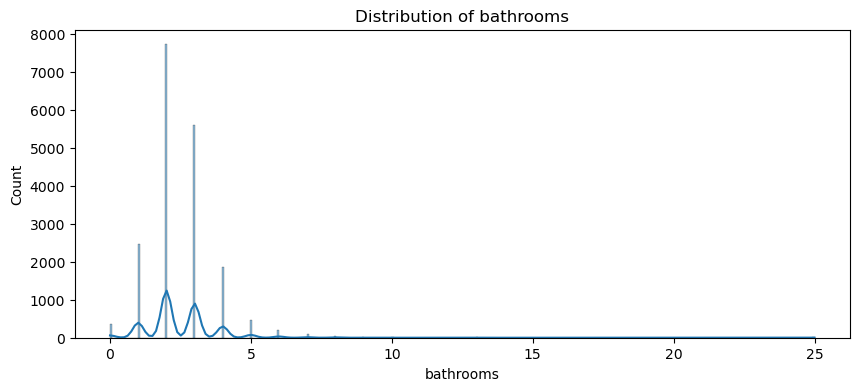

C:\Users\SHRIRANGA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


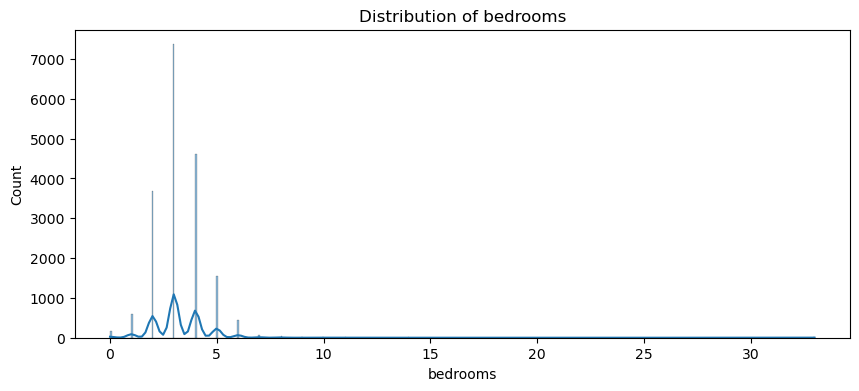

C:\Users\SHRIRANGA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


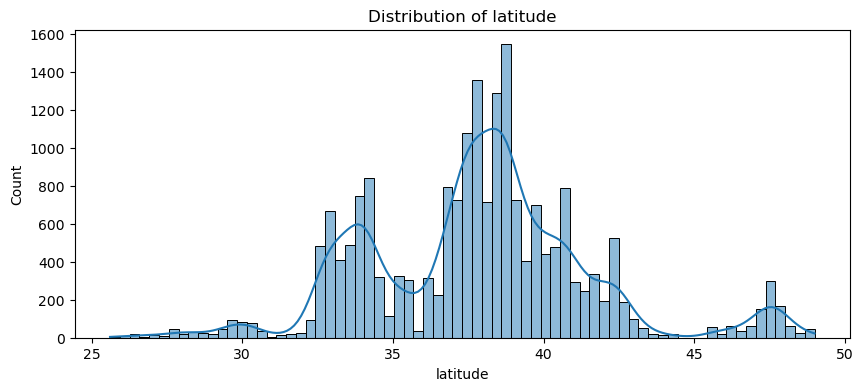

C:\Users\SHRIRANGA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


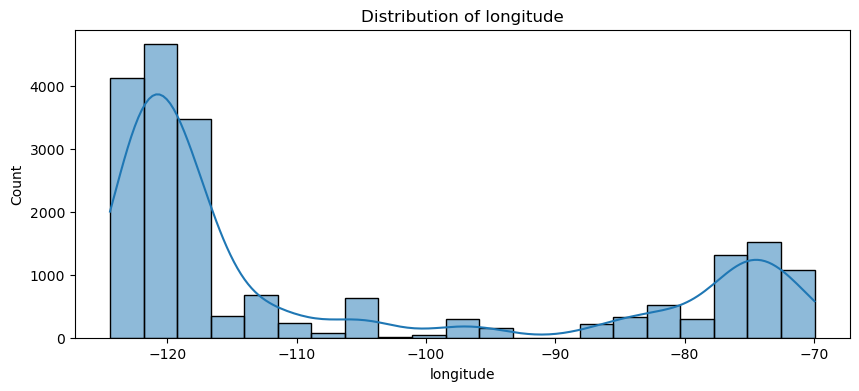

C:\Users\SHRIRANGA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


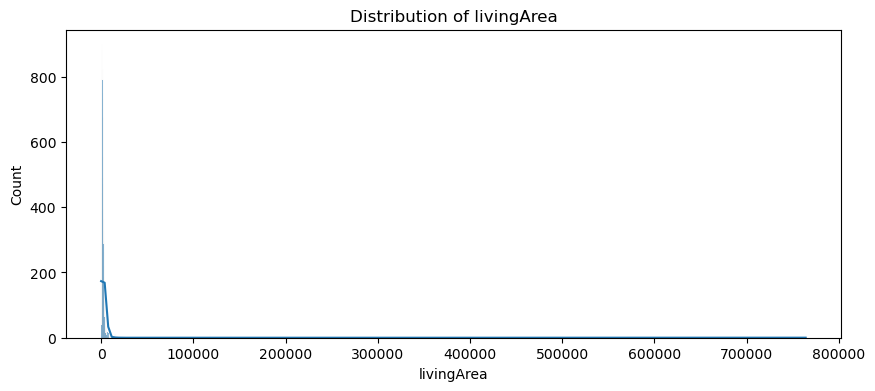

C:\Users\SHRIRANGA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

KeyboardInterrupt



In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perform a basic Exploratory Data Analysis (EDA) on the selected DataFrame

# Basic statistics for numerical columns
stats = df_selected.describe()

# Distribution plots for numerical features
for column in df_selected.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_selected[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Boxplots for numerical features to identify outliers
for column in df_selected.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_selected[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Correlation heatmap to visualize correlations between numerical features
correlation_matrix = df_selected.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# For categorical features: count plots to understand the distribution
for column in df_selected.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df_selected[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Output the basic statistics
stats


## Creating a detailed Data Flow Diagram (DFD) for data transformation in the context of preparing a Zillow housing dataset would involve several stages. Here is a textual description of what such a DFD might entail, from the extraction of data to its final form, ready for analysis:

**Level 0: Data Collection and Input**
- **External Entity**: Zillow API via RapidAPI.
- **Data Store**: Raw Data Repository.
- **Process**: Data Extraction.

**Level 1: Data Preprocessing**
- **Process 1.1**: Data Cleaning
  - **Input**: Raw Data Repository.
  - **Output**: Clean Data Store.
  - Sub-Processes:
    - Remove null values.
    - Detect and handle outliers.
    - Normalize text entries.
  
- **Process 1.2**: Data Transformation
  - **Input**: Clean Data Store.
  - **Output**: Transformed Data Store.
  - Sub-Processes:
    - Feature engineering.
    - Encoding categorical variables.
    - Scaling and normalization of numerical variables.

- **Process 1.3**: Data Standardization
  - **Input**: Transformed Data Store.
  - **Output**: Standardized Data Store.
  - Sub-Processes:
    - Standardize column names.
    - Ensure consistent data types.
    - Align datasets for merging.

**Level 2: Data Integration**
- **Process 2.1**: Data Merging
  - **Input**: Standardized Data Stores (from multiple sources if necessary).
  - **Output**: Integrated Data Set.
  - Sub-Processes:
    - Merge datasets on key identifiers.
    - Resolve conflicts from data overlap.

**Level 3: Data Segregation for Model Development**
- **Process 3.1**: Data Splitting
  - **Input**: Integrated Data Set.
  - **Output**: Training Set, Validation Set, Test Set.
  - Sub-Processes:
    - Split data based on predefined ratios.
    - Ensure stratified sampling if needed.

**Level 4: Final Data Output for Modeling**
- **Process 4.1**: Data Finalization
  - **Input**: Training Set, Validation Set, Test Set.
  - **Output**: Data Ready for Regression Analysis.
  - Sub-Processes:
    - Final integrity check.
    - Export data to CSV or database for model access.

In a visual DFD, these stages would be connected with arrows indicating the flow of data, and each data store, external entity, and process would be represented by standard DFD symbols. Data flows between processes, entities, and data stores showing how the input data is transformed step by step into a format suitable for machine learning model development.

In [97]:
#bathrooms	bedrooms	city	homeType	latitude	livingArea	longitude	lotArea_sqft	price	      state	      streetAddress	zipcode																																
#full_baths  beds        city    style        latitude    sqft       longitude   lot_sqft        sold_price    state        street
